In [1]:
from periodicLatticeSolver import PeriodicLatticeSolver
from minimizer import Minimizer
import numpy as np
from FloorPlanClass import FloorPlan
from plotter import Plotter
PLS = PeriodicLatticeSolver(200, .02)
PLS.add_Injector()

L1 = PLS.Variable('L1', varMin=.01, varMax=.5)
L2= PLS.Variable('L2', varMin=.01, varMax=.5)
L3 =PLS.Variable('L3', varMin=.01, varMax=.5)
L4= PLS.Variable('L4', varMin=.01, varMax=.5)

Bp1 = PLS.Variable('Bp1', varMin=.1, varMax=.45)
Bp2 = PLS.Variable('Bp2', varMin=.1, varMax=.45)
Bp3 = PLS.Variable('Bp3', varMin=.1, varMax=.45)
Bp4 = PLS.Variable('Bp4', varMin=.1, varMax=.45)

rp1 = PLS.Variable('rp1', varMin=.01, varMax=.03)
rp2 = PLS.Variable('rp2', varMin=.01, varMax=.03)
rp3 = PLS.Variable('rp3', varMin=.01, varMax=.03)
rp4 = PLS.Variable('rp4', varMin=.01, varMax=.03)

r0=PLS.Variable('r0',varMin=.9,varMax=1.1)
TL1=PLS.Variable('TL1',varMin=.5,varMax=1.5)
TL2=PLS.Variable('TL2',varMin=.5,varMax=1.5)


PLS.set_Track_Length(TL1=TL1,TL2=TL2)
PLS.begin_Lattice()

PLS.add_Bend(None, r0, .45)
PLS.add_Drift(L=.03)
PLS.add_Lens(L4, Bp4, rp4)
PLS.add_Drift()
PLS.add_Combiner()
PLS.add_Drift()
PLS.add_Lens(L1, Bp1,rp1)
PLS.add_Drift(L=.03)
PLS.add_Bend(None, r0, .45)
PLS.add_Drift(L=.03)
PLS.add_Lens(L2, Bp2, rp2)
PLS.add_Drift()
PLS.add_Lens(L3, Bp3, rp3)
PLS.add_Drift(L=.03)
PLS.end_Lattice()

330 180
Lattice model completed


100%|██████████| 5000/5000 [10:58:27<00:00,  7.90s/it]


minCost for each thread:  [1.59956679 1.70368522 1.70039795 1.66224434 1.68427391 1.66040082
 1.66211935 1.66166233 1.6842351  1.63677055 1.65929661 1.6915622
 1.64438722 1.62340791 1.61388371 1.61219141 1.65486916 1.64431806
 1.57696756 1.65003149 1.77307007 1.65193346 1.60795604 1.58468927
 1.69434783 1.59934019 1.63604837 1.64936993 1.5938767  1.68105652
 1.65624727 1.65631139 1.64556972 1.62255583 1.67646927 1.67420442
 1.62470399 1.61120866 1.6108182  1.65859272 1.66917376 1.67598383
 1.65281993 1.6256802  1.59309404 1.63909965 1.59551038 1.62949662
 1.57318792 1.65253966 1.57995834 1.55465067 1.65744728 1.53400335
 1.63108854 1.59258445 1.62650497 1.53560128 1.52681834 1.53777283
 1.5239541  1.5127539  1.63802198 1.66112385]


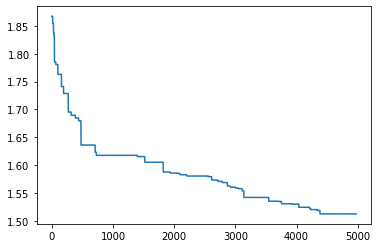

[0.5        0.4988446  0.5        0.32429811 0.23726719 0.17155317
 0.26831431 0.45       0.03       0.0282499  0.03       0.02833653
 0.92369284 0.84809813 1.5        0.2        0.12488112 0.01184571] 1.5127539020763536
percent particles surviving (x,y): 27.0, 12.2
[0.5        0.4988446  0.5        0.32429811 0.23726719 0.17155317
 0.26831431 0.45       0.03       0.0282499  0.03       0.02833653
 0.92369284 0.84809813 1.5        0.2        0.12488112 0.01184571] 1.5127539020763536
done
Total time 658 minutes and 29 seconds


In [2]:
minimizer=Minimizer(PLS)
minimizer.find_Global_Min(mut=1,popPerDim=20,iterations=5000,herds=64,strategy='best/1')

[0.1454 0.4054 0.3721 0.5    0.0164 0.03   0.0284 0.0144 0.9    0.5307
 1.1749]


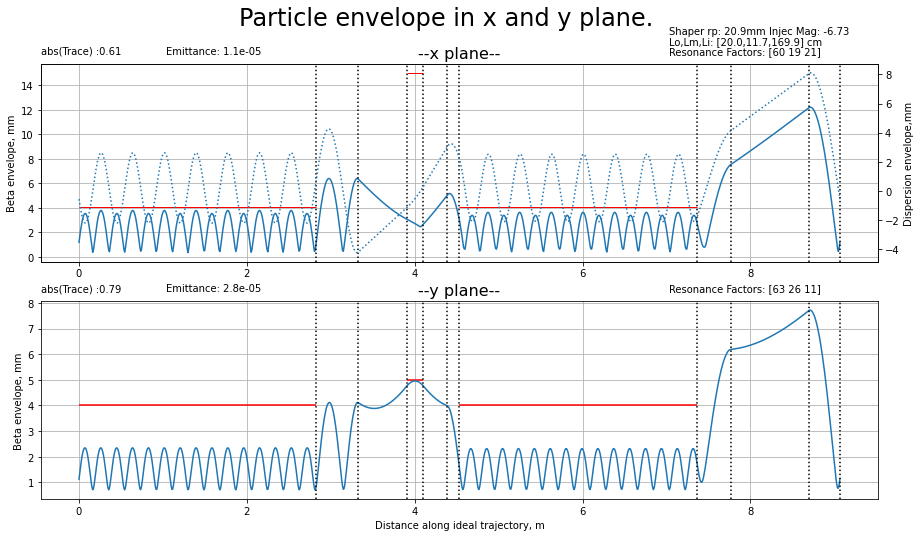

In [7]:
plotter=Plotter(PLS)
plotter.plot(sol=minimizer.sol)

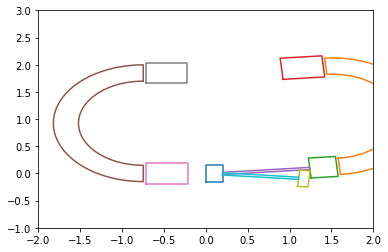

4.0

In [3]:
floorPlan=FloorPlan(PLS)
floorPlan.show_Floor_Plan(sol=minimizer.sol)
floorPlan.calculate_Cost()

In [5]:
args=[0.01    ,   0.5   ,     0.45354926 ,0.15293024 ,0.02158133 ,0.03,
 0.02859317 ,0.01640303, 0.96829063, 0.5     ,   1.06678003 ,0.18716899,
 0.11065167, 0.03274518]
totalLengthList=PLS.totalLengthListFunc(*args[:-3])
envList,emittanceArrList=minimizer.make_Envelope_And_Emittance_List(args,totalLengthList)
minimizer.find_Clipped_Particles(totalLengthList,args[:-3], envList)

(311, 176)